The advantages of support vector machines are:

1- Effective in high dimensional spaces.

2- Still effective in cases where number of dimensions is greater than the number of samples.

3- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

4-Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

In [1]:
from sklearn.svm import SVC
import numpy as np

In [2]:
X = np.array([[0, 0],[1, 1]])
y = np.array([-1, 1])

In [3]:
clf = SVC()

In [4]:
%%capture
clf.fit(X, y);

In [5]:
test=[-0.7, -1]
clf.predict([test])

array([-1])

In [6]:
clf.support_vectors_

array([[0., 0.],
       [1., 1.]])

In [7]:
# get indices of support vectors
clf.support_

array([0, 1], dtype=int32)

In [8]:
# get number of support vectors for each class
clf.n_support_

array([1, 1], dtype=int32)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
dataset = pd.read_csv('./data/age_salary.csv')

In [11]:
X = dataset.iloc[:, [2, 3]].values
X.shape

(400, 2)

In [12]:
y = dataset.iloc[:, 4].values
y.shape

(400,)

In [13]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
Xtrain.shape

(320, 2)

In [15]:
Xtest.shape

(80, 2)

In [16]:
%%capture
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest  = sc.transform(Xtest)

In [17]:
classifier = SVC(kernel='linear', random_state=0)

In [18]:
classifier.fit(Xtrain, ytrain)

SVC(kernel='linear', random_state=0)

In [19]:
r_ages = np.arange(start=Xtest[:, 0].min(), stop=Xtest[:, 0].max(), step=0.01)
r_salaries = np.arange(start=Xtest[:, 1].min(), stop=Xtest[:, 1].max(), step=0.01)

X1, X2 = np.meshgrid(r_ages, r_salaries)

# test.shape  :  (160328, 2)
test = np.array([X1.ravel(), X2.ravel()]).T
test

array([[-1.96547978, -1.59138156],
       [-1.95547978, -1.59138156],
       [-1.94547978, -1.59138156],
       ...,
       [ 2.09452022,  2.31861844],
       [ 2.10452022,  2.31861844],
       [ 2.11452022,  2.31861844]])

In [20]:
pred = classifier.predict(test)
z = pred.reshape(X1.shape)
z.shape

(392, 409)

/tmp/ipykernel_7447/1204136271.py:1: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(Xtest[ytest == 0, 0], Xtest[ytest == 0, 1],
/tmp/ipykernel_7447/1204136271.py:3: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(Xtest[ytest == 1, 0], Xtest[ytest == 1, 1],


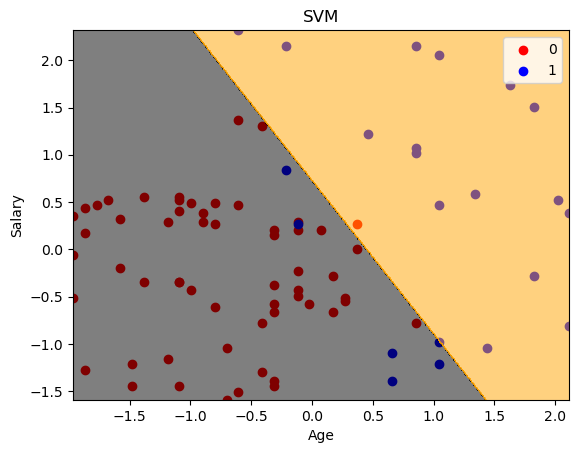

In [21]:
plt.scatter(Xtest[ytest == 0, 0], Xtest[ytest == 0, 1],
            c=ListedColormap(('r', 'b'))(0), label=0)
plt.scatter(Xtest[ytest == 1, 0], Xtest[ytest == 1, 1],
            c=ListedColormap(('r', 'b'))(1), label=1)

plt.contourf(X1, X2, z, alpha=0.5, cmap=ListedColormap(('k', 'orange')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

plt.title('SVM')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(loc='best')